<a href="https://colab.research.google.com/github/dango80/Models_examples/blob/main/Example%20of%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook is a simple elementary project with an example of KNN model to see how it works


Importing the necessary libraries. We use #Matplotlib inline to see directly on the notebook our graphics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the file that we will use 
df = pd.read_csv('/content/drive/MyDrive/Car-mpg- Dataset.csv')

In [ ]:
#THe target variable will be "car_type"
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


**PreProcessing**

In [ ]:
We want to use the KNN mmodel so the car_name  variable is not useful in this case

In [ ]:
df=df.drop("car_name",axis=1)
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


we could use all the variables but for simplicity we choos to drop the variable horsepower that object. IT could be converted with tecniquues of encoding but for this example is ok to drop it.

In [ ]:
df=df.drop("hp",axis=1)
df

,mpg,cyl,disp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,3504,12.0,70,1,0
1,15.0,8,350.0,3693,11.5,70,1,0
2,18.0,8,318.0,3436,11.0,70,1,0
3,16.0,8,304.0,3433,12.0,70,1,0
4,17.0,8,302.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82,1,1
394,44.0,4,97.0,2130,24.6,82,2,1
395,32.0,4,135.0,2295,11.6,82,1,1
396,28.0,4,120.0,2625,18.6,82,1,1


In [ ]:
#in this case we will have a problem of binary clasification that we could solve with KNN model
df.car_type.unique()

array([0, 1])

Let's create the target Variable

In [ ]:
y=df.car_type
y

0      0
1      0
2      0
3      0
4      0
      ..
393    1
394    1
395    1
396    1
397    1
Name: car_type, Length: 398, dtype: int64

# Standardize the Data
---

To make comparable the variables respecting the different magnitudes we have to normalize the data respect to the values of the variables.

We will use for this a specific function of Scikit learn called StandardScaler, we create an instance and it will analize the data with the fit() method.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("car_type",axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we transform the scaler with the tranform() method to have a scaled values of the same variables



In [ ]:
variabili_st = scaler.transform(df.drop('car_type',axis=1))

Now we can have a new dataset normalized 

In [ ]:
df_norm = pd.DataFrame(variabili_st, columns=df.columns[:-1])
df_norm.head()

,mpg,cyl,disp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.565841,-1.840117,-1.627426,-0.715145


We can check with the describe() method that the values are now scaled

In [ ]:
df_norm.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.761610e-16,-5.171742e-16,-8.312725e-17,-9.902743e-17,8.982206e-17,-8.837152e-16,-4.781212e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.859374e+00,-1.444949e+00,-1.204411e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-7.151448e-01
25%,-7.704907e-01,-8.563206e-01,-8.563178e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.151448e-01
50%,-6.591883e-02,-8.563206e-01,-4.314040e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-7.151448e-01
75%,7.027050e-01,1.498191e+00,6.584879e-01,7.538337e-01,5.834349e-01,8.096310e-01,5.332220e-01
max,2.957335e+00,1.498191e+00,2.511784e+00,2.565185e+00,3.351912e+00,1.621983e+00,1.781589e+00


NOw it's time to import the library to make the split of the dataset in Train and Test set and we can split the data to fit the model on the train. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(variabili_st, y, test_size=0.30, random_state=101)
X_train

array([[-1.2188546 ,  1.49819126,  1.19623199, ..., -0.93241945,
        -1.35664215, -0.71514478],
       [ 0.19028912, -0.85632057, -0.77229532, ..., -0.56934055,
        -1.35664215,  1.78158875],
       [ 0.94610257, -0.85632057, -0.8491159 , ..., -0.3878011 ,
         0.53884683, -0.71514478],
       ...,
       [ 1.13825853, -0.85632057, -0.82991075, ...,  0.51989614,
         1.08041511,  1.78158875],
       [-1.2188546 ,  1.49819126,  1.40748858, ..., -2.74781393,
        -1.62742629, -0.71514478],
       [ 1.39446648, -0.85632057, -0.9163339 , ...,  0.22943302,
         1.35119925, -0.71514478]])

**The Model**

In [ ]:
#The library for KNN classification
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Instantiate the model with k =3
MyKnn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#FIt the model on train data
MyKnn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
MyKnn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
pred = MyKnn.predict(X_test)

**Measures of Evaluation**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[61  1]
 [ 0 58]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.98      1.00      0.99        58

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



The model is highly accurate( This was a quite simple example) but we want to find a better accuracy triyng to change the parameter k of the KNN

In [ ]:
error = []

# Let's iterate for different value of k
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error')

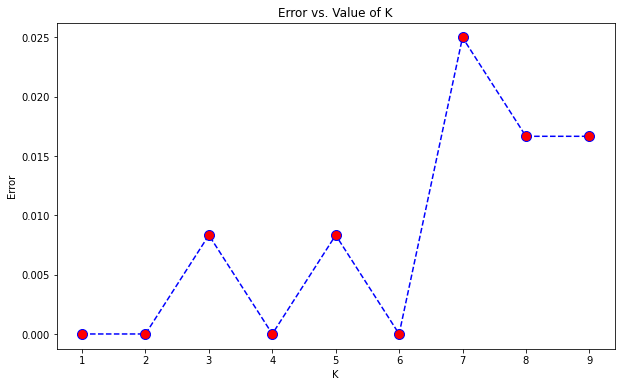

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),errore, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error vs. Value of K')
plt.xlabel('K')
plt.ylabel('Error')

We found out that the best values for k are differents(1,2,4,6) let's try to apply the model with k ==4

In [ ]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Valore di K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Valore di K=30


[[62  0]
 [ 0 58]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        58

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
We can see that we have 100% of the correct predictions for k ==4

SyntaxError: ignored